_Импортируем необходимые библиотеки, загрузим датасет, посмотрим основные характеристики данных_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')

In [3]:
data_mat.shape, data_por.shape

((395, 33), (649, 33))

In [5]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


_Датасет делится на две части по типу изучаемого предмета, объединим их в один для удобства_

In [6]:
data_mat['course'] = 'mat'
data_por['course'] = 'por'

In [7]:
all_data = pd.concat([data_mat, data_por], ignore_index=True)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

In [9]:
all_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


In [10]:
all_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


_Данные состоят из 1044 объектов и 33 признаков. Большинство признаков - категориальные, сразу представленные в числовой форме,
что упрощает работу с ними. Исследуем распределение признаков и некоторые зависимости_

Посмотрим распределение по возрасту в выборке

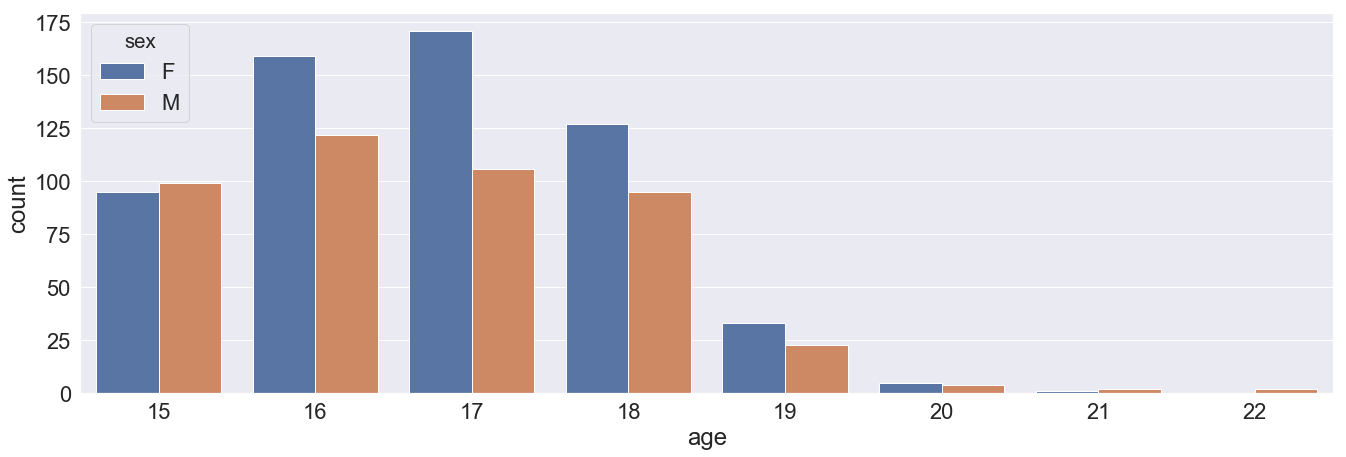

In [11]:
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.countplot(x=all_data.age,hue=all_data.sex);

In [12]:
all_data.sex.value_counts()

F    591
M    453
Name: sex, dtype: int64

Посмотрим на корреляционную матрицу признаков

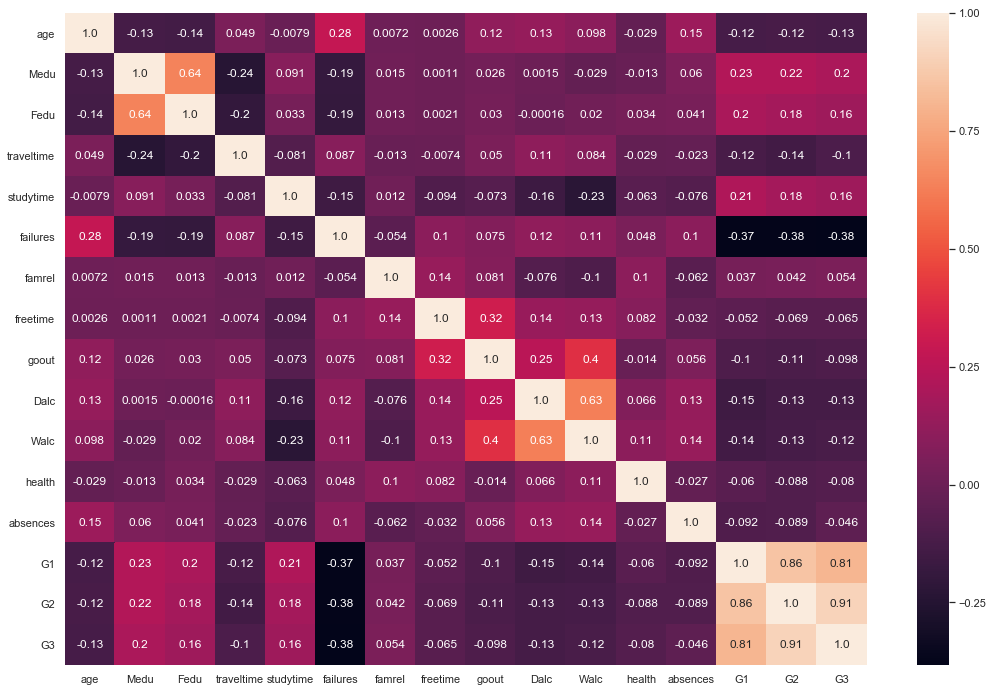

In [13]:
plt.figure(figsize=(16,12))
sns.set(font_scale=1)
sns.heatmap(all_data.corr(), annot = True,fmt = ".2", cbar = True)

Из таблицы видно, что ожидаемо высокую корреляцию между собой имеют оценки за первый\второй периоды обучения и итоговая оценка. 
Количество свободного времени(freetime) коррелирует с частотой прогулок с друзьями (goout) и уровнем потребления 
алкоголя (Dalc\Walc). Также видно, что количество времени, затрачиваемого на учебу(studytime), коррелирует с оценками(G1,G2,G3).
Показательна отрицательная зависимость количества неудач при сдаче предмета от оценок, что впрочем очевидно.
Пойдем дальше и построим несколько графиков.

Для построения графиков переведем все категориальные признаки в числовую форму. Также создадим дополнительный признак - 
суммарное потребление алкоголя путём объединения Dalc(уровень потребление алкоголя в будни) и Walc(в выходные).

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols_to_encode = ['school','sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
                 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in cols_to_encode:
    all_data[col] = le.fit_transform(all_data[col])
all_data['total_alco'] = all_data['Walc'] + all_data['Dalc']

Посмотрим признаки с наибольшей корреляцией с итоговой оценкой

<Figure size 1440x504 with 0 Axes>

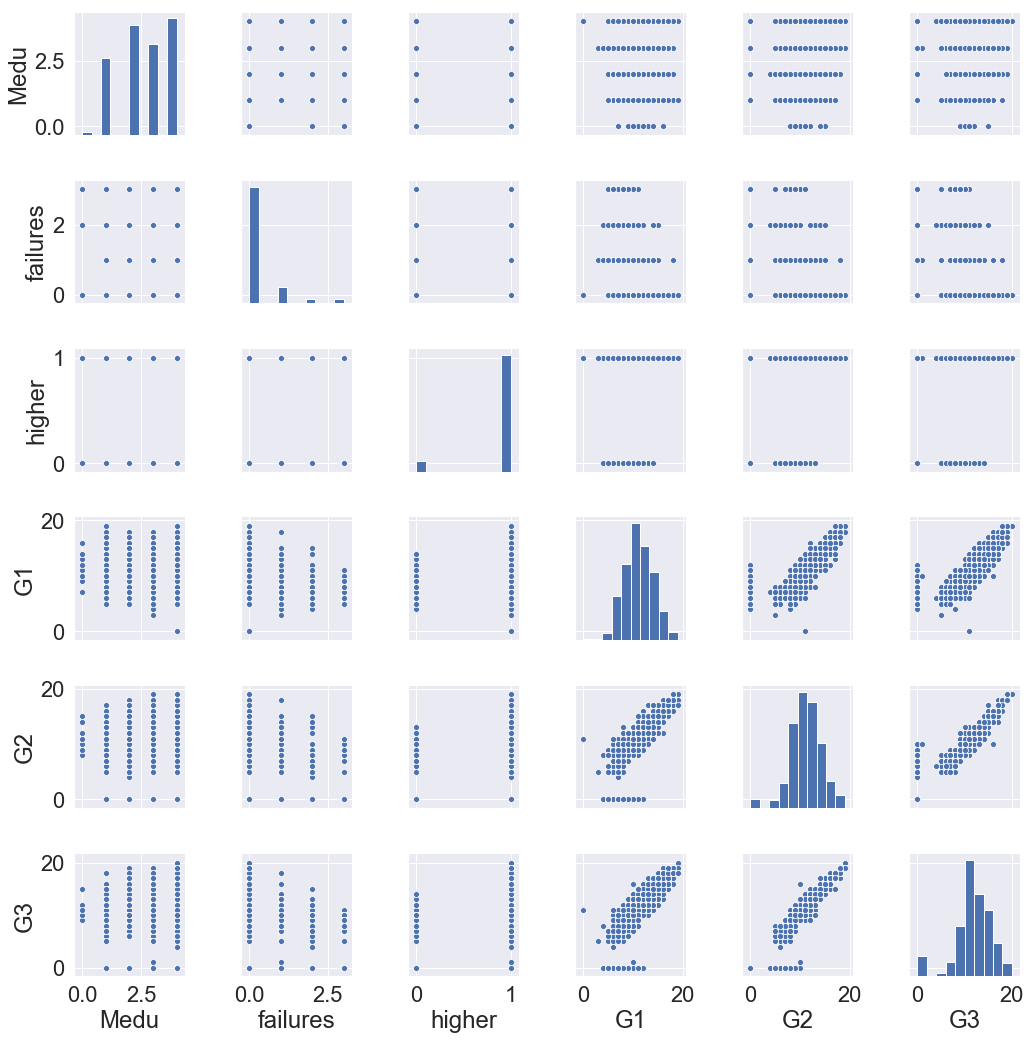

In [15]:
сorr = all_data.corr()
best_corr_data = all_data.loc[:,np.abs(сorr['G3'].values) > 0.20]
plt.figure(figsize=(20,7))
sns.set(font_scale=2)
sns.pairplot(best_corr_data);

Из графиков видно, что на оценку также положительно влияет образование матери(Medu) и желание получить высшее 
образование (higher)

Итоговый балл у городских и деревенских жителей

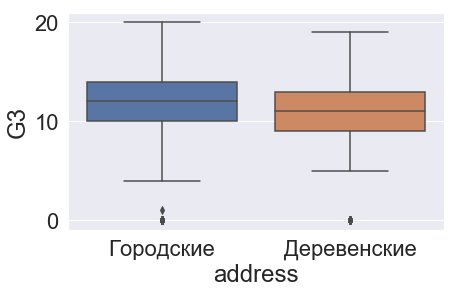

In [16]:
sns.boxplot(x=all_data['address'].map({0: 'Деревенские', 1: 'Городские'}), y='G3', data=all_data)

Время, затрачиваемое на учебу

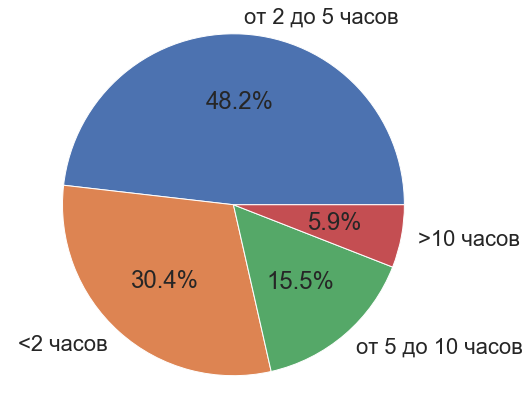

In [18]:
plt.figure(figsize=(7,7))
plt.pie(all_data['studytime'].value_counts().tolist(), 
        labels=['от 2 до 5 часов', '<2 часов', 'от 5 до 10 часов', '>10 часов'], 
        autopct='%1.1f%%')
axis = plt.axis('equal')

Как влияет время от дома до школы на оценку

[[Text(0,0,'<15 мин'),
  Text(0,0,'15-30 мин'),
  Text(0,0,'30-60 мин'),
  Text(0,0,'> 60 мин')]]

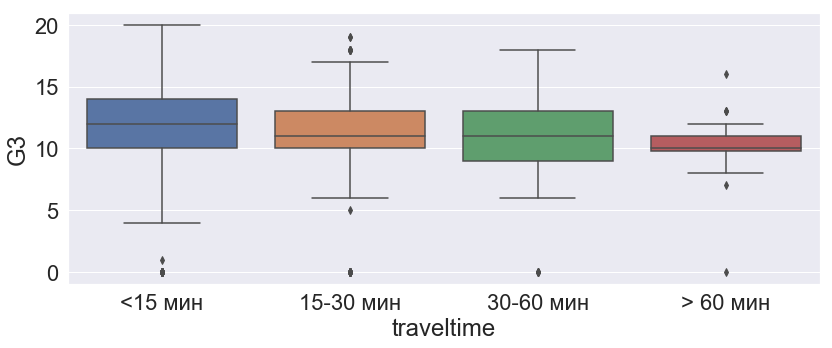

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='traveltime', y='G3', data=all_data).set(xticklabels='<15 мин,15-30 мин,30-60 мин,> 60 мин'.split(','))

Плотность распределения оценок

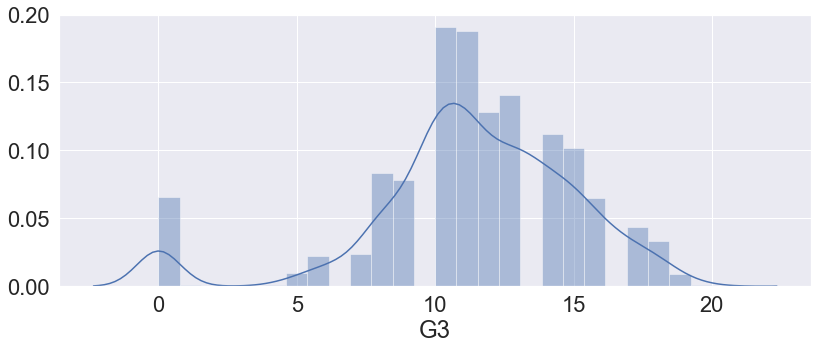

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(all_data.G3)

Зависимость оценки от времени, затрачиваемого на учебу 

[[Text(0,0,'<1 часа'),
  Text(0,0,'2-2.5 часа'),
  Text(0,0,'5-10 часов'),
  Text(0,0,'> 10 часов')]]

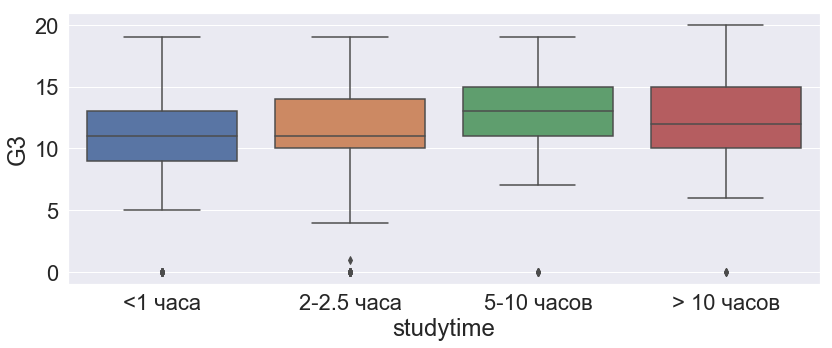

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(x='studytime', y='G3', data=all_data).set(xticklabels='<1 часа,2-2.5 часа,5-10 часов,> 10 часов'.split(','))

In [ ]:
Зависимость оценки от количества потребляемого алкоголя

[[Text(0,0,'низкое'),
  Text(0,0,'ниже среднего'),
  Text(0,0,'среднее'),
  Text(0,0,'выше среднего'),
  Text(0,0,'высокое')]]

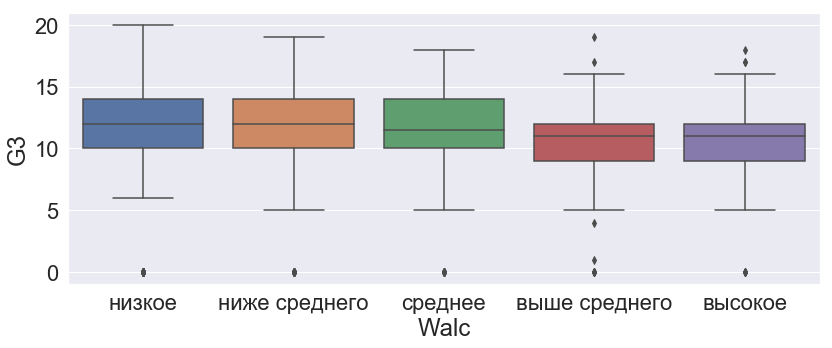

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Walc', y='G3', data=all_data).set(xticklabels='низкое,ниже среднего,среднее,выше среднего,высокое'.split(','))

Характер употребление алкоголя в будни и выходные

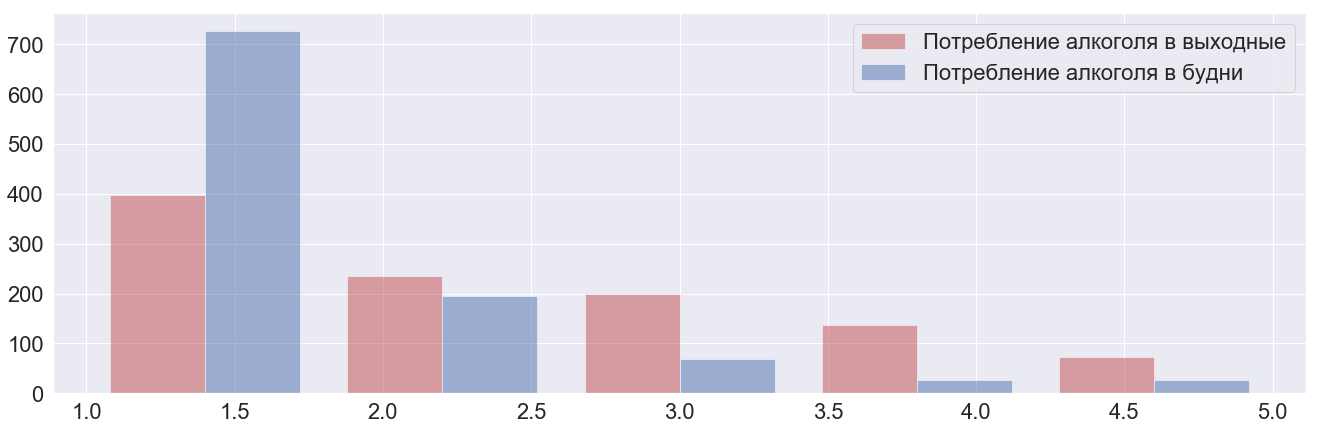

In [24]:
plt.figure(figsize=(20,7))
plt.hist([all_data.Walc, all_data.Dalc], color=['r','b'], alpha=0.5, bins=5, label=['Потребление алкоголя в выходные', 
                                                                                    'Потребление алкоголя в будни'])
plt.legend()

График распределения оценок в зависимости от общего уровня употребления алкоголя

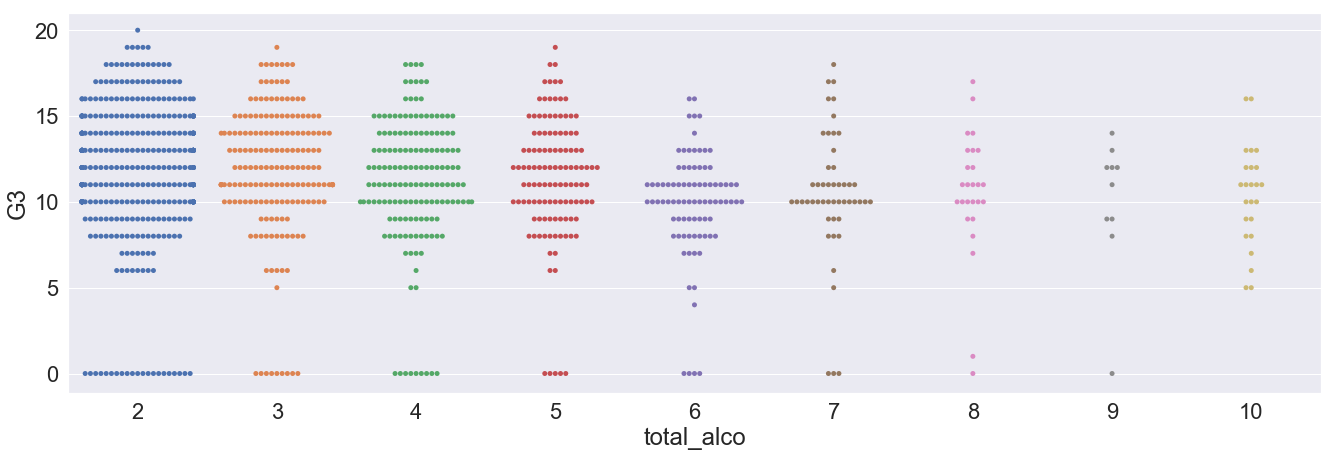

In [25]:
plt.figure(figsize=(20,7))
sns.swarmplot(x="total_alco",y="G3",data=all_data)

Зависимость уровня потребления алкоголя от времени, затрачиваемого на учебу

[[Text(0,0,'<1 часа'),
  Text(0,0,'2-2.5 часа'),
  Text(0,0,'5-10 часов'),
  Text(0,0,'> 10 часов')]]

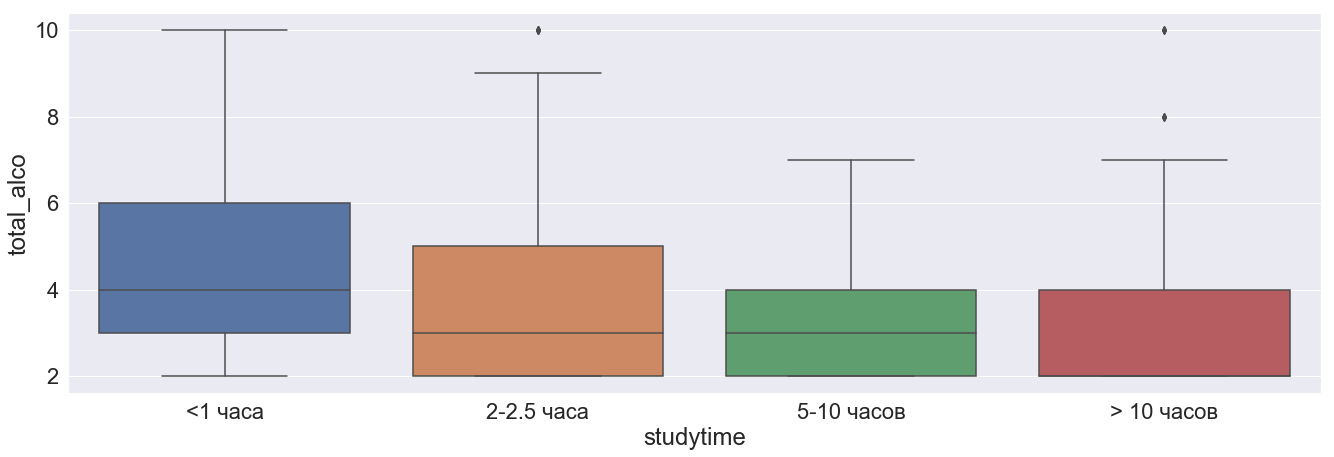

In [26]:
plt.figure(figsize=(20,7))
sns.boxplot(x='studytime', y='total_alco', data=all_data).set(xticklabels='<1 часа,2-2.5 часа,5-10 часов,> 10 часов'.split(','))

        Варианты использования данных
        
    1) Подтверждение кажущихся очевидными утверждений (не особо интересно):

Влияет ли образование\род деятельности родителей, расстояние от дома до школы, наличие интернета дома, 
время, затрачиваемое на учебу\отдых, количество пропусков занятий и проч. на успеваемость ученика.

    2) Поиск зависимостей(иногда неочевидных) между признаками (уже интереснее):
    
Как влияет количество потребляемого алкоголя на успеваемость? Как образование\род деятельности родителей влияет
на отношения внутри семьи? на количество потребляемого алкоголя? Всегда ли большее количество времени, затрачиваемое на
занятия приносит больший результат? Влияет ли наличие интернета дома на количество времени, проводимого с друзьями?
Есть ли зависимость между потреблением алкоголя и состоянием здоровья? Как влияет на успеваемость наличие пары у ученика?

    3) Использование полученной информации для решения практических задач.
    
    Образовательные цели:
        
Выявление факторов, влияющих на успеваемость ученика, проведение работы над устранением негативных факторов.
Улучшение качества образования: например, введение онлайн-курса и отслеживание успеваемости учеников, имеющих дома интернет и
уделяющих достаточно времени на учебу. Эксперимент может дать данные об эффективности подобного подхода.

    Воспитательные цели:
        
Выявление факторов, влияющих на состояние здоровья, отношения с родителям, количества времени, уделяемого учебе,
количества употребляемого алкоголя. Возможность выявлять группы риска, оказание своевременной психологической помощи.

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  * * * * * * * * * * 

Решим задачу предсказания итоговой оценки.

__Модели__

Это типичная задача регрессии, поэтому будет использовать модель линейной регрессии, ансамбль деревьев и
модели с регуляризацией (LASSO, Ridge и ElasticNet).

__Метрики__

В качестве метрики можно взять среднюю абсолютную ошибку(MAE), среднюю квадратичную ошибку(MSE), корень из MSE(RMSE) либо
коэффициент детерминации R. Возьмем RMSE, так как метрика выражается в тех же единицах, что и измеряемая величина.

__Стратегия кросс-валидации__

Хороший тон - это делить датасет на 3 части: тренировочную, тестовую и валидационную выборки. В данном задании объем данных
невелик, поэтому будем делить только на тренировочную и тестовую в соотношении 80/20.
Будем проводить кросс-валидацию на 5 фолдах, предварительно перемешав данные.

Проверка пропущенных значений

In [27]:
all_data.isna().any().sum()

0

In [28]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
from sklearn.utils import shuffle
all_data = shuffle(all_data)

In [30]:
y = all_data.G3.values
X = all_data.drop(['G1', 'G2', 'G3', 'course'], axis=1).values

In [31]:
X.shape, y.shape

((1044, 31), (1044,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
def crossval_result(model, X, y, n_folds = 5 ):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [34]:
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest']
models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(n_estimators=100)]
for model_name, model in list(zip(model_names, models)):
    score = crossval_result(model, X_train, y_train)
    print("{0} score: {1:.4f} ({2:.4f})\n".format(model_name, score.mean(), score.std()))

LinearRegression score: 3.5360 (0.3298)

Lasso score: 3.8814 (0.3069)

Ridge score: 3.5353 (0.3292)

ElasticNet score: 3.7430 (0.2989)

RandomForest score: 3.3533 (0.2058)



Посмотрим на важность признаков для ансамбля случайных деревьев

In [35]:
forest = RandomForestRegressor(n_estimators=100, n_jobs=1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

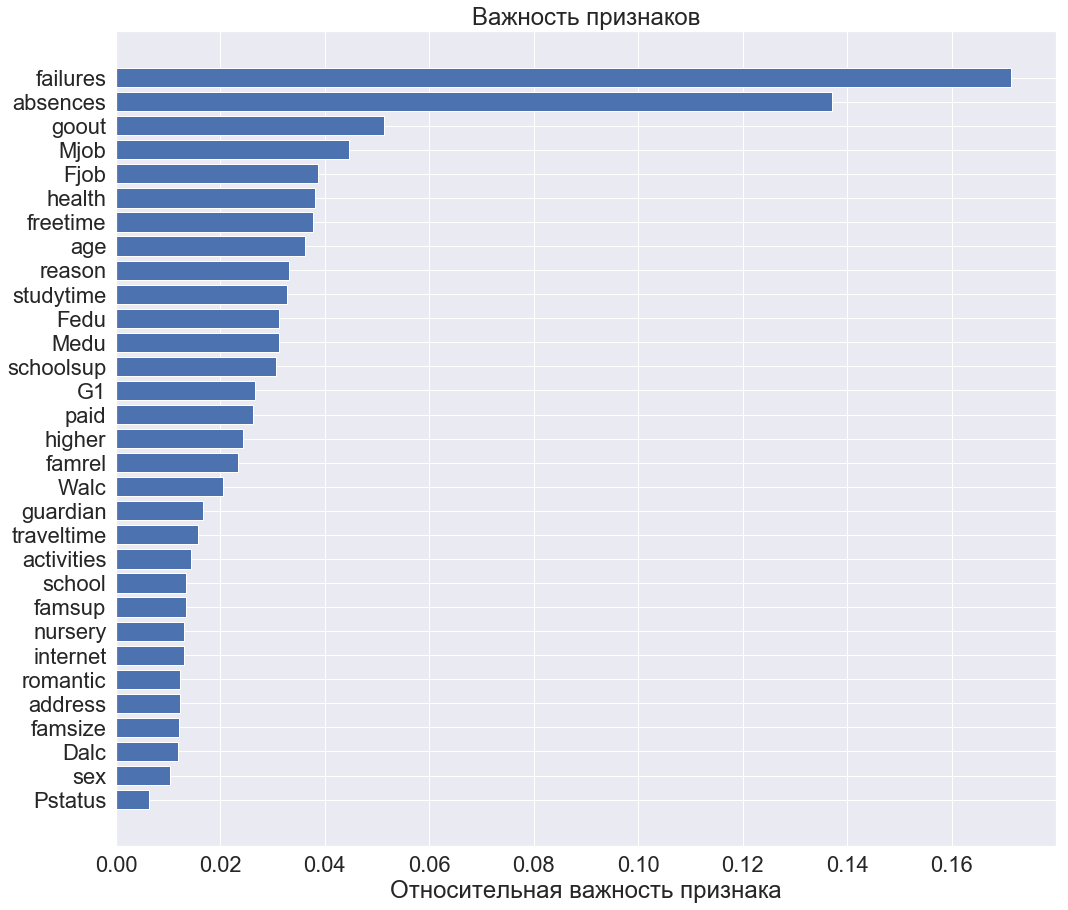

In [36]:
features = all_data.iloc[:,:-4].columns
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Относительная важность признака');

Из графика видно, что наибольный вклад вносят признаки failure(количество неудачных сдач предмета) и absences(количество         пропущенных занятий)

Можно настроить гиперпараметры моделей. Например, параметр регуляризации у модели с L-1 регуляризацией

In [37]:
alphas = np.arange(0.01, 1.2, 0.05)
lasso = LassoCV(alphas=alphas).fit(X_train, y_train)
mses, alphas_ = lasso.mse_path_, lasso.alphas_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5,1,'Зависимость ошибки от настройки параметра модели')

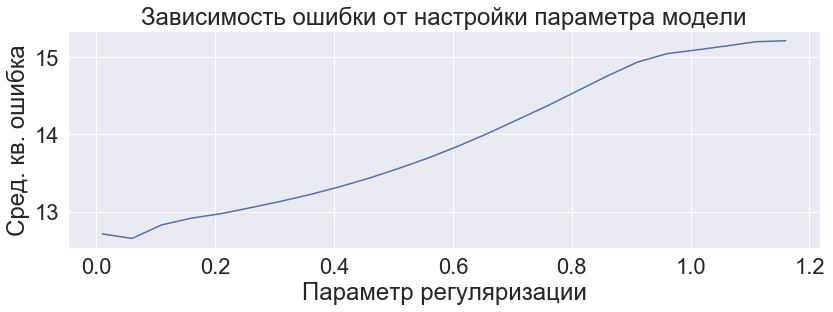

In [38]:
mean_mses = mses.mean(axis=1)
plt.figure(figsize=(12,4))
plt.plot(alphas_, mean_mses)
plt.xlabel('Параметр регуляризации')
plt.ylabel('Сред. кв. ошибка')
plt.title('Зависимость ошибки от настройки параметра модели')

In [39]:
min_mse_index = np.where(mean_mses == min(mean_mses))
print('Оптимальное значение параметра регуляризации alpha = {}'.format(alphas_[min_mse_index][0]))

Оптимальное значение параметра регуляризации alpha = 0.060000000000000005


Можно попробовать разбить учеников в группы по схожим показателям

In [40]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=3)
model.fit(X)
clust_labels = model.predict(X)

Text(0,0.5,'Пропуски занятий')

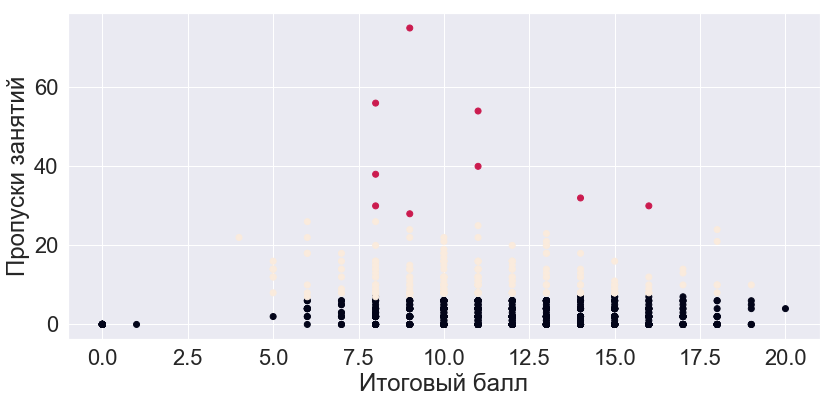

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(all_data.G3, all_data.absences, c=clust_labels)
plt.xlabel('Итоговый балл')
plt.ylabel('Пропуски занятий')

### Что можно еще сделать для улучшения результата предсказания:
    
    1) Попробовать более мощные методы решения задачи предсказания: например, нейронные сети, градиентный бустинг.
    2) Использовать объединение нескольких моделей.
    3) Провести оптимизацию параметров моделей, проанализировать рассчитанные моделью веса признаков.
    4) Попробовать брать не все признаки.
    5) Создать искуственные признаки.
    

### Если если бы было больше времени и существенно больший датасет:
    1) Можно провести статистическую проверку гипотез о влиянии разных факторов на итоговый балл учеников.
    2) Попробовать сегментировать учеников, выделить в группы по признакам с помощью алгоритмов кластеризации. Использовать
    метод главных компонент для понижения размерности признакового пространства.
    3) Поставить задачу классификации: попробовать предсказывать качественные признаки учеников.
    